In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [78]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'INFY'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [79]:
data.reset_index(inplace=True)

In [80]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,6.706250,6.805000,6.662500,6.681250,4.987726,14123200
1,2012-01-04,6.700000,6.757500,6.638750,6.650000,4.964397,9913600
2,2012-01-05,6.651250,6.793750,6.640000,6.751250,5.039983,12347200
3,2012-01-06,6.726250,6.750000,6.640000,6.740000,5.031584,10824000
4,2012-01-09,6.771250,6.932500,6.752500,6.917500,5.164093,16880000
...,...,...,...,...,...,...,...
2756,2022-12-14,18.750000,18.969999,18.600000,18.719999,18.232409,7721700
2757,2022-12-15,18.330000,18.360001,18.010000,18.170000,17.696735,6568600
2758,2022-12-16,18.110001,18.219999,17.690001,17.730000,17.268194,15368300
2759,2022-12-19,17.860001,17.990000,17.790001,17.879999,17.414288,10765900


In [81]:
ma_100_days = data.Close.rolling(100).mean()

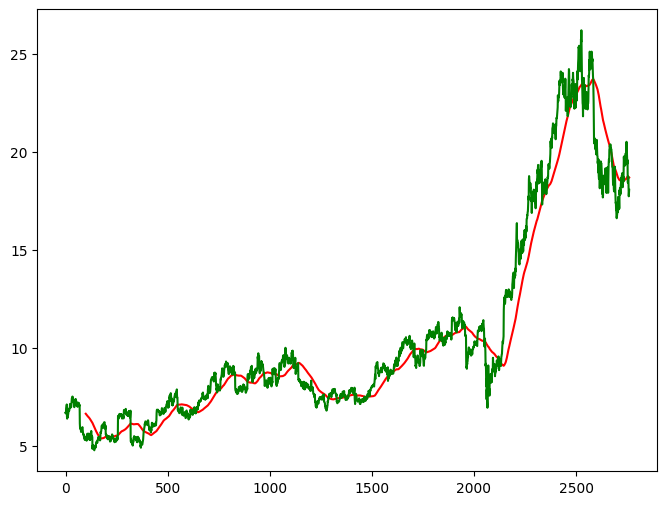

In [82]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [83]:
ma_200_days = data.Close.rolling(200).mean()

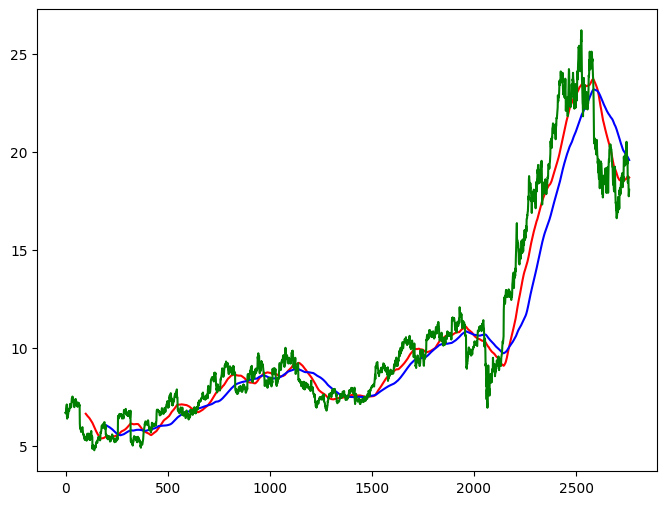

In [84]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [85]:
data.dropna(inplace=True)

In [86]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [87]:
data_train.shape[0]

2208

In [88]:
data_test.shape[0]

553

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [90]:
data_train_scale = scaler.fit_transform(data_train)

In [91]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [92]:
x, y = np.array(x), np.array(y)

In [93]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [94]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\lahas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [95]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [96]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - loss: 0.0611
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.0077
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0056
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - loss: 0.0051
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - loss: 0.0053
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0042
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0043
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - loss: 0.0041
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0037
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.0035
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0040
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - loss: 0.0033
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0031
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 0.0033
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - los

In [97]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [98]:
pas_100_days = data_train.tail(100)

In [99]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [100]:
data_test_scale  =  scaler.fit_transform(data_test)

In [101]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [102]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step


In [103]:
scale =1/scaler.scale_

In [104]:
y_predict = y_predict*scale

In [105]:
y = y*scale

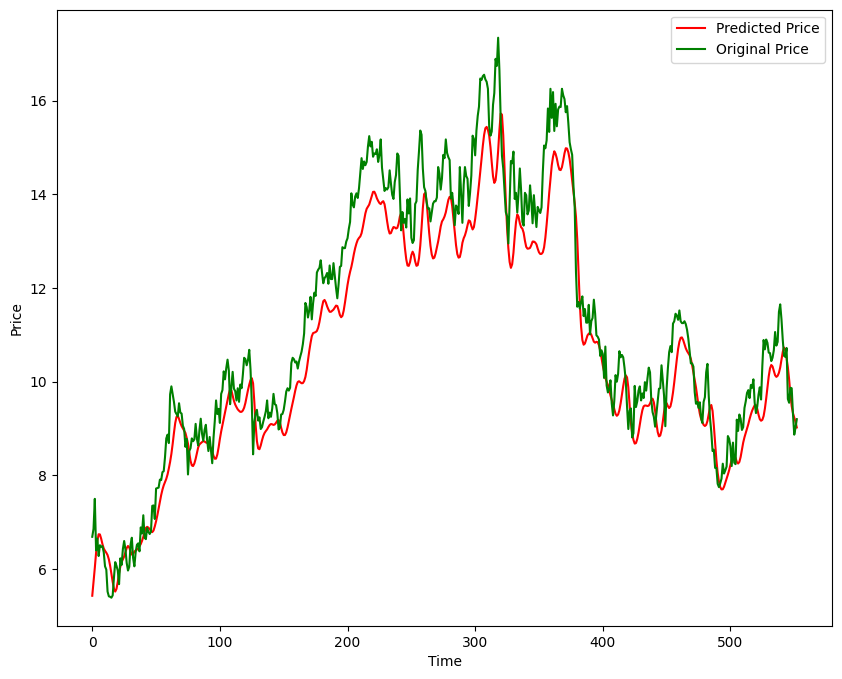

In [106]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [107]:
model.save('Stock Predictions Model.keras')